<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/03_neural_networks/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Recurrent Neural Networks (RNNs)

Recurrent Neural Networks are designed to handle **sequential data** by maintaining a memory of previous inputs.

In this notebook, you will:
- Understand how RNNs work
- Build a simple RNN in Keras
- Train it on a sequence classification task (IMDB Sentiment)
- Compare to other sequence models (LSTM/GRU)

## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

## **Load and Preprocess IMDB Dataset**

In [2]:
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print("Training shape:", X_train.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (25000, 200)


In [3]:
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [4]:
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [1987,    2,   45, ...,  125,    4, 3077],
       [4468,  189,    4, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

### **What Is an RNN?**

RNNs are neural networks designed to process sequences.

At each time step:
    `h_t = f(Wx_t + Uh_{t-1} + b)`

Where:
- **x_t**: Input at time t
- **h_t**: Hidden state
- **W, U**: Learnable weights
- **f**: Activation (e.g., tanh or ReLU)

RNNs pass information forward **through time** using hidden states.


### **Build RNN Model**

In [5]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    SimpleRNN(units=32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **Train the Model**

In [6]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.6048 - loss: 0.6353 - val_accuracy: 0.8040 - val_loss: 0.4478
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.8609 - loss: 0.3396 - val_accuracy: 0.8394 - val_loss: 0.3971
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9146 - loss: 0.2278 - val_accuracy: 0.8432 - val_loss: 0.3813
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.9535 - loss: 0.1359 - val_accuracy: 0.8368 - val_loss: 0.4434
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.9779 - loss: 0.0726 - val_accuracy: 0.8290 - val_loss: 0.5775


### **Plot Accuracy and Loss**

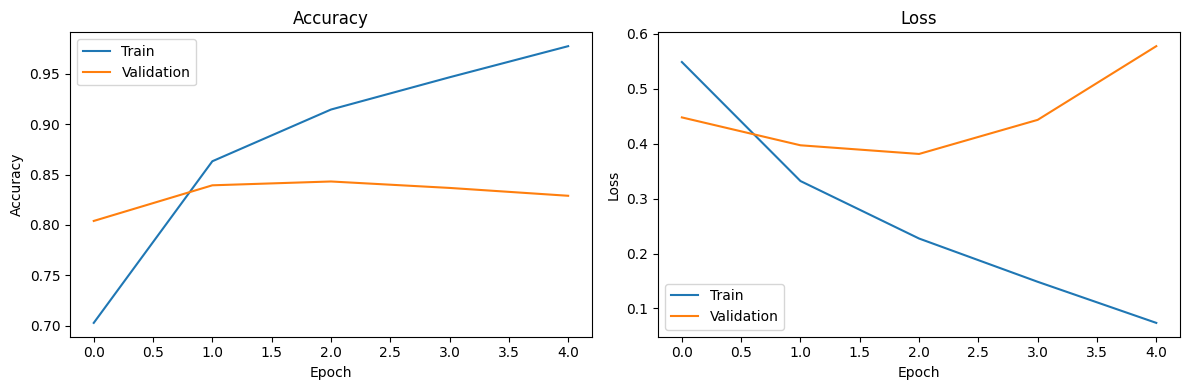

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


### **Evaluate Model on Test Set**

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8278 - loss: 0.5647
Test Accuracy: 0.8289


### **RNN Limitations**
- Struggle with long-term dependencies
- Suffer from vanishing gradients

### **Solutions**
- **LSTM (Long Short-Term Memory)**
- **GRU (Gated Recurrent Unit)**

We’ll explore these next in `lstm.ipynb` and `gru.ipynb`.


### **Summary**

- You learned what RNNs are and why they matter
- Built a basic RNN for binary text classification
- Saw how they process sequences and maintain memory

**Next:** Try `data_versioning.md` to learn more about Deployment, tracking, versioning.